### A5

In [13]:
import pandas as pd

def load_data(file_path, sheet_name):
    df=pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def find_datatypes(df):
    print(df.dtypes)

def find_categorical_attributes(df):
    categorical_attributes=df.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns:{categorical_attributes}")

def study_numeric_range(df):
    numeric_columns=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print(f"Numerical columns:{numeric_columns}")

def find_missing_values(df):
    missing_values=df.isnull().sum()
    print(f"{missing_values}")

def study_outliers(df):
    numeric_columns=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for column in numeric_columns:
        mean=df[column].mean()
        std_dev=df[column].std()
        variance=df[column].var()
        print(f"Column:{column}")
        print(f"Mean:{mean}")
        print(f"Variance:{variance}")
        print(f"Standard deviation:{std_dev}")
        lower_bound=mean-3*std_dev
        upper_bound=mean+3*std_dev
        outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
        print(f"Potential outliers in {column}:\n{outliers[[column]]}\n")


file_path=r"C:\Users\Gurram Bhavya Reddy\Downloads\Lab Session Data.xlsx"
sheet_name="thyroid0387_UCI"
df=load_data(file_path, sheet_name)

find_datatypes(df)
find_categorical_attributes(df)
study_numeric_range(df)
find_missing_values(df)
study_outliers(df)


Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

  ### A6

In [20]:
import pandas as pd

def load_data(file_path, sheet_name):
    df=pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def data_imputation(df):
    numeric_columns=df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categorical_columns=df.select_dtypes(include=["object"]).columns.tolist()
    for column in numeric_columns:
        mean=df[column].mean()
        std_dev=df[column].std()
        lower_bound=mean-3*std_dev
        upper_bound=mean+3*std_dev
        outlier=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
        if outlier.empty:
            df[column].fillna(mean)
            print(f"Filled missing values in {column} with mean:{mean}")
        else:
            median=df[column].median()
            df[column].fillna(median)
            print(f"Filled missing values in {column} with median:{median}")
    for column in categorical_columns:
        mode=df[column].mode()[0]
        df[column].fillna(mode, inplace=True)
        print(f"Filled missing values in {column} with mode: {mode}")
    return df


file_path=r"C:\Users\Gurram Bhavya Reddy\Downloads\Lab Session Data.xlsx"
sheet_name="thyroid0387_UCI"
df=load_data(file_path, sheet_name)
df_imputed=data_imputation(df)
df_imputed.to_excel(r"C:\Users\Gurram Bhavya Reddy\Documents\thyroid_imputed.xlsx", index=False)


Filled missing values in Record ID with mean:852947346.6122983
Filled missing values in age with median:55.0
Filled missing values in sex with mode: F
Filled missing values in on thyroxine with mode: f
Filled missing values in query on thyroxine with mode: f
Filled missing values in on antithyroid medication with mode: f
Filled missing values in sick with mode: f
Filled missing values in pregnant with mode: f
Filled missing values in thyroid surgery with mode: f
Filled missing values in I131 treatment with mode: f
Filled missing values in query hypothyroid with mode: f
Filled missing values in query hyperthyroid with mode: f
Filled missing values in lithium with mode: f
Filled missing values in goitre with mode: f
Filled missing values in tumor with mode: f
Filled missing values in hypopituitary with mode: f
Filled missing values in psych with mode: f
Filled missing values in TSH measured with mode: t
Filled missing values in TSH with mode: ?
Filled missing values in T3 measured with m

C:\Users\Gurram Bhavya Reddy\AppData\Local\Temp\ipykernel_6440\3882741881.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode, inplace=True)


### A7

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def data_normalization(df):
    numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    print("Numeric columns identified for normalization:", numeric_columns)
    
    scaler_minmax = MinMaxScaler()
    scaler_standard = StandardScaler()

    for column in numeric_columns:
        # Check if the data contains outliers
        std_dev = df[column].std()
        mean = df[column].mean()
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        outlier = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if outlier.empty:
            # Use Min-Max Scaling for data without significant outliers
            df[column] = scaler_minmax.fit_transform(df[[column]])
            print(f"Normalized {column} using Min-Max Scaling.")
        else:
            # Use Standard Scaling for data with potential outliers
            df[column] = scaler_standard.fit_transform(df[[column]])
            print(f"Standardized {column} using Standard Scaling.")
    
    return df

# File path and sheet name
file_path = r"C:\Users\Gurram Bhavya Reddy\Downloads\Lab Session Data.xlsx"
sheet_name = "thyroid0387_UCI"

# Load and normalize data
df = load_data(file_path, sheet_name)
df_normalized = data_normalization(df)

# Save the normalized data to a new Excel file
df_normalized.to_excel(r"C:\Users\Gurram Bhavya Reddy\Documents\thyroid_normalized.xlsx", index=False)


Numeric columns identified for normalization: ['Record ID', 'age']
Normalized Record ID using Min-Max Scaling.
Standardized age using Standard Scaling.


### A8

In [24]:
import pandas as pd

def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def extract_binary_attributes(df):
    binary_columns = df.columns[df.nunique() == 2]  # Identifies binary columns (0/1 or similar)
    return df[binary_columns]

def calculate_jc_smc(vector1, vector2):
    f11 = sum((vector1 == 1) & (vector2 == 1))
    f00 = sum((vector1 == 0) & (vector2 == 0))
    f01 = sum((vector1 == 0) & (vector2 == 1))
    f10 = sum((vector1 == 1) & (vector2 == 0))
    
    # Calculate Jaccard Coefficient
    denominator_jc = f01 + f10 + f11
    if denominator_jc == 0:
        jc = None  # or jc = 0
    else:
        jc = f11 / denominator_jc
    
    # Calculate Simple Matching Coefficient
    denominator_smc = f00 + f01 + f10 + f11
    if denominator_smc == 0:
        smc = None  # or smc = 0
    else:
        smc = (f11 + f00) / denominator_smc
    
    return jc, smc

# Load the dataset
file_path = r"C:\Users\Gurram Bhavya Reddy\Downloads\Lab Session Data.xlsx"
sheet_name = "thyroid0387_UCI"
df = load_data(file_path, sheet_name)

# Extract binary attributes
df_binary = extract_binary_attributes(df)

# Select the first two observation vectors
vector1 = df_binary.iloc[0]
vector2 = df_binary.iloc[1]

# Calculate JC and SMC
jc, smc = calculate_jc_smc(vector1, vector2)

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")


Jaccard Coefficient (JC): None
Simple Matching Coefficient (SMC): None


### A9

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to load data from Excel file
def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

# Function to preprocess the data
def preprocess_data(df):
    # Label encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include=["object"]).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column].astype(str))
    
    # Fill missing values with the column mean
    df.fillna(df.mean(), inplace=True)
    
    return df

# Function to calculate Cosine Similarity between two vectors
def calculate_cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude_vector1 = np.linalg.norm(vector1)
    magnitude_vector2 = np.linalg.norm(vector2)
    cosine_similarity = dot_product / (magnitude_vector1 * magnitude_vector2)
    return cosine_similarity

# Load the dataset
file_path = r"C:\Users\Gurram Bhavya Reddy\Downloads\Lab Session Data.xlsx"
sheet_name = "thyroid0387_UCI"
df = load_data(file_path, sheet_name)

# Preprocess the data
df_processed = preprocess_data(df)

# Select the first two observation vectors
vector1 = df_processed.iloc[0].values
vector2 = df_processed.iloc[1].values

# Calculate Cosine Similarity
cosine_similarity = calculate_cosine_similarity(vector1, vector2)

print(f"Cosine Similarity: {cosine_similarity}")


Cosine Similarity: 0.9999999999999458


### A10

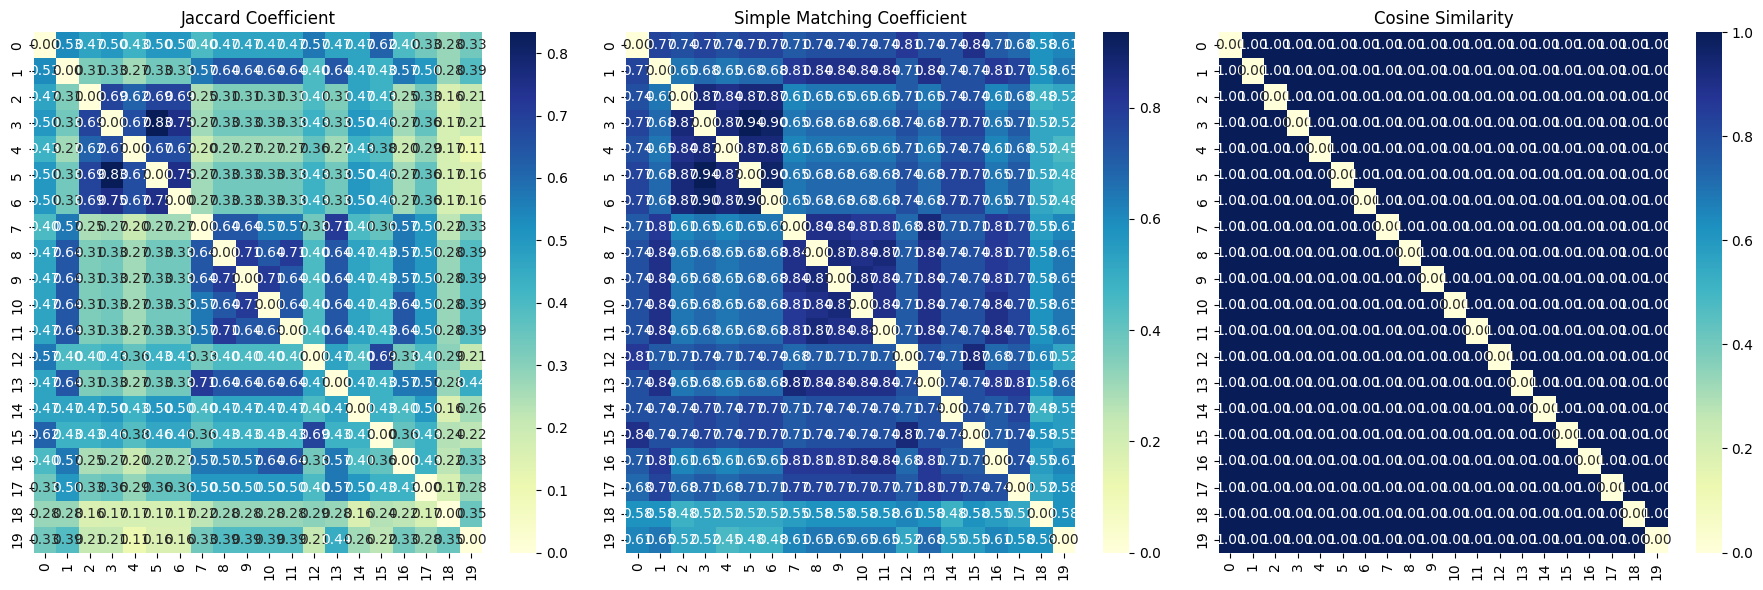

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import jaccard

# Function to load data from Excel file
def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

# Function to preprocess the data
def preprocess_data(df):
    # Label encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include=["object"]).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column].astype(str))
    
    # Fill missing values with the column mean
    df.fillna(df.mean(), inplace=True)
    
    return df

# Function to calculate Jaccard Coefficient
def calculate_jaccard_coefficient(vector1, vector2):
    return 1 - jaccard(vector1, vector2)

# Function to calculate Simple Matching Coefficient
def calculate_smc(vector1, vector2):
    return np.sum(vector1 == vector2) / len(vector1)

# Function to calculate Cosine Similarity
def calculate_cosine_similarity(vector1, vector2):
    # Convert vectors to numpy arrays
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    
    # Compute the dot product
    dot_product = np.dot(vector1, vector2)
    
    # Compute the magnitudes
    magnitude_vector1 = np.linalg.norm(vector1)
    magnitude_vector2 = np.linalg.norm(vector2)
    
    # Compute the cosine similarity
    if magnitude_vector1 == 0 or magnitude_vector2 == 0:
        return 0  # To handle zero vectors
    cosine_similarity = dot_product / (magnitude_vector1 * magnitude_vector2)
    
    # Clip the value to be between -1 and 1
    cosine_similarity = np.clip(cosine_similarity, -1.0, 1.0)
    
    return cosine_similarity

# Load the dataset
file_path = r"C:\Users\Gurram Bhavya Reddy\Downloads\Lab Session Data.xlsx"
sheet_name = "thyroid0387_UCI"
df = load_data(file_path, sheet_name)

# Preprocess the data
df_processed = preprocess_data(df)

# Select the first 20 observation vectors
df_subset = df_processed.head(20)
vectors = df_subset.values

# Initialize matrices for JC, SMC, and COS
num_vectors = len(vectors)
jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))

# Calculate JC, SMC, and COS for each pair of vectors
for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            jc_matrix[i, j] = calculate_jaccard_coefficient(vectors[i], vectors[j])
            smc_matrix[i, j] = calculate_smc(vectors[i], vectors[j])
            cos_matrix[i, j] = calculate_cosine_similarity(vectors[i], vectors[j])

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Jaccard Coefficient")

sns.heatmap(smc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Simple Matching Coefficient")

sns.heatmap(cos_matrix, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Cosine Similarity")

plt.tight_layout()
plt.show()
